In [1]:
import pandas as pd
import numpy as np
import json
from pprint import pprint
from tools.df_data import *

# Производственная практика 
## Исследование свойств знаковой процедурыпостроения МСТ
Выполнила Кислицына Анастасия

### Введение

**Цель практики:** закрепление и развитие профессиональныхкомпетенций научно-исследовательской,организационно-управленческой, экспертно-аналитическойдеятельности.   


**Задачи:**  
1. закрепление полученных в течение обучения знаний;
2. приобретение практических навыков в области прикладнойматематики и информатики;
3. формирование навыков самоорганизации, планирования ианализа полученного в ходе практики опыта.
4. приобретение навыков поиска информации, сбора данныхи их обработки;
5. знакомство со структурой организации

### Индивидуальное задание 
- Реализация функций генерации случайных чисел изсовместных распределений класса эллиптических(распределение Стьюдента, смесь распределенияСтьюдента и нормального распределения).  
- Применение данных функций генераций в знаковойпроцедуре построения MST с помощью алгоритма Примаи Краскала. 
- Сравнение результатов, полученных для новыхреализованных распределений, с уже имеющимисярезультатами для нормального совместногораспределения.

### Результаты

### 1. Для графа "простой путь"

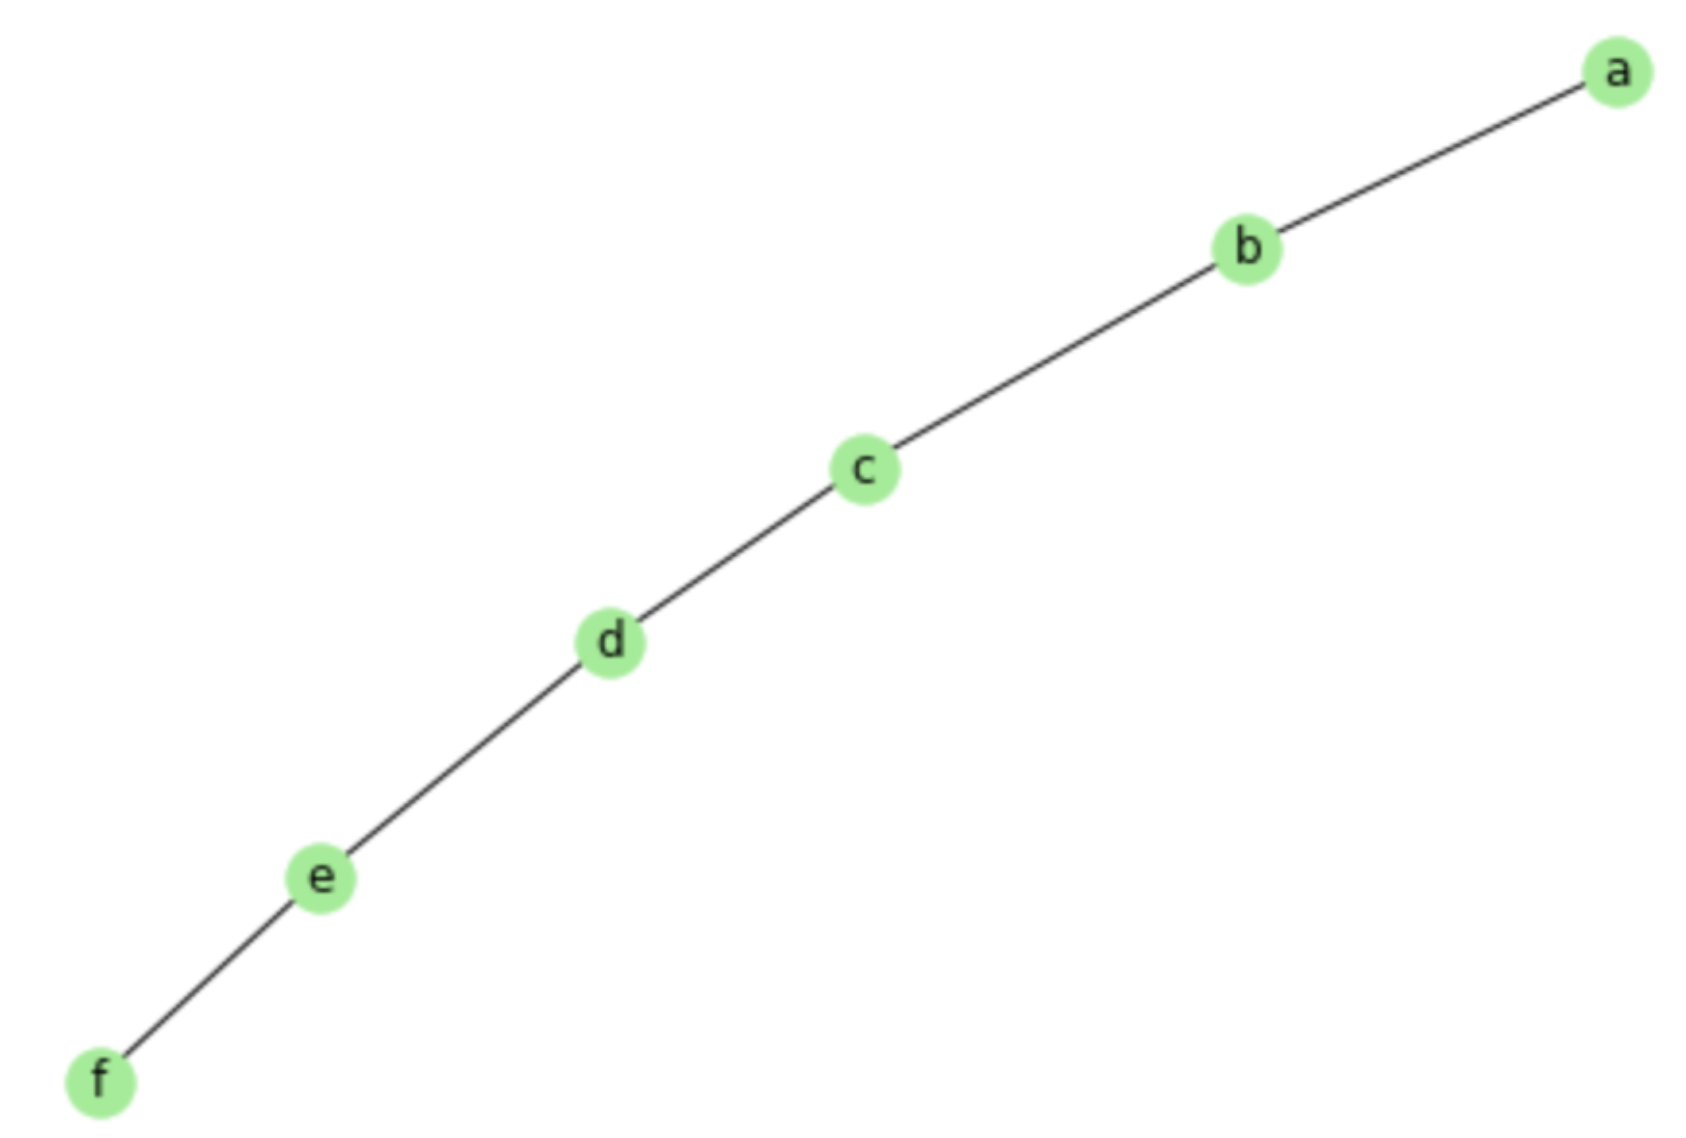

#### 1.1. Нормальное распределение

In [2]:
with open("data/path_normal.json", "r") as read_file:
    data = json.load(read_file)
tuples, values = for_normal(data)
index = pd.MultiIndex.from_tuples(tuples, names=['procedure', 'alpha', 'algorithm'])
df = pd.DataFrame(values, index=index, columns=['20 obs', '100 obs', '500 obs'])
df

20 obs  100 obs  500 obs
procedure        alpha algorithm                          
pearson          -     -           0.591    0.998    1.000
sign             -     -           0.175    0.894    1.000
oneSided_notRand 0.1   Prim        0.001    0.359    1.000
                       Kruskal     0.005    0.332    0.997
oneSided_rand    0.1   Prim        0.000    0.284    1.000
                       Kruskal     0.000    0.285    0.998
oneSided_max     0.1   Prim        0.001    0.402    1.000
                       Kruskal     0.001    0.368    1.000
twoSided_rand    0.1   Prim        0.011    0.319    1.000
                       Kruskal     0.013    0.344    0.995
twoSided_max     0.1   Prim        0.189    0.860    1.000
                       Kruskal     0.178    0.859    1.000

#### 1.2. Распределение Стьюдента

In [80]:
with open("data/path_student.json", "r") as read_file:
    data = json.load(read_file)
tuples, values = for_stud(data)
index = pd.MultiIndex.from_tuples(tuples, names=['dof', 'procedure', 'alpha', 'algorithm'])
df = pd.DataFrame(values, index=index, columns=['20 obs', '100 obs', '250 obs'])
df

20 obs  100 obs  250 obs
dof procedure        alpha algorithm                          
2   pearson          -     -           0.261    0.522    0.616
    sign             -     -           0.168    0.896    1.000
    oneSided_notRand 0.1   Prim        0.001    0.323    0.935
                           Kruskal     0.001    0.403    0.946
    oneSided_rand    0.1   Prim        0.000    0.228    0.925
                           Kruskal     0.002    0.335    0.941
    oneSided_max     0.1   Prim        0.002    0.356    0.947
                           Kruskal     0.005    0.439    0.950
    twoSided_rand    0.1   Prim        0.008    0.260    0.918
                           Kruskal     0.012    0.347    0.912
    twoSided_max     0.1   Prim        0.190    0.868    1.000
                           Kruskal     0.187    0.872    1.000
3   pearson          -     -           0.360    0.762    0.903
    sign             -     -           0.166    0.903    0.999
    oneSided_notRand 0.1   Prim        0.001    0.360    0.946
                           Kruskal     0.001    0.421    0.945
    oneSided_rand    0.1   Prim        0.000    0.236    0.944
                           Kruskal     0.000    0.328    0.952
    oneSided_max     0.1   Prim        0.000    0.364    0.944
                           Kruskal     0.003    0.416    0.945
    twoSided_rand    0.1   Prim        0.014    0.247    0.895
                           Kruskal     0.023    0.329    0.901
    twoSided_max     0.1   Prim        0.179    0.902    0.998
                           Kruskal     0.169    0.906    0.998

#### 1.3. Смешанное распределение

In [78]:
with open("data/path_mix.json", "r") as read_file:
    data = json.load(read_file)
tuples, values = for_mix(data)
index = pd.MultiIndex.from_tuples(tuples, names=['n rate', 'dof', 'procedure', 'alpha', 'algorithm'])
df = pd.DataFrame(values, index=index, columns=['20 obs', '100 obs', '250 obs'])
df
# display(pprint(data))

20 obs  100 obs  250 obs
n rate dof procedure        alpha algorithm                          
0.5    2   pearson          -     -           0.257    0.485    0.610
           sign             -     -           0.153    0.853    0.998
           oneSided_notRand 0.1   Prim        0.000    0.362    0.969
                                  Kruskal     0.000    0.360    0.941
           oneSided_rand    0.1   Prim        0.000    0.273    0.966
                                  Kruskal     0.000    0.287    0.916
           oneSided_max     0.1   Prim        0.000    0.394    0.960
                                  Kruskal     0.002    0.361    0.935
           twoSided_rand    0.1   Prim        0.009    0.320    0.939
                                  Kruskal     0.014    0.292    0.888
           twoSided_max     0.1   Prim        0.176    0.880    0.995
                                  Kruskal     0.174    0.876    0.995
       3   pearson          -     -           0.326    0.766    0.900
           sign             -     -           0.135    0.843    0.998
           oneSided_notRand 0.1   Prim        0.000    0.385    0.962
                                  Kruskal     0.003    0.311    0.942
           oneSided_rand    0.1   Prim        0.001    0.281    0.947
                                  Kruskal     0.000    0.270    0.917
           oneSided_max     0.1   Prim        0.000    0.368    0.967
                                  Kruskal     0.002    0.346    0.937
           twoSided_rand    0.1   Prim        0.013    0.276    0.928
                                  Kruskal     0.021    0.283    0.898
           twoSided_max     0.1   Prim        0.171    0.883    0.995
                                  Kruskal     0.182    0.883    0.995
0.3    2   pearson          -     -           0.232    0.484    0.579
           sign             -     -           0.160    0.857    1.000
           oneSided_notRand 0.1   Prim        0.000    0.394    0.962
                                  Kruskal     0.002    0.317    0.929
           oneSided_rand    0.1   Prim        0.000    0.286    0.951
                                  Kruskal     0.000    0.233    0.911
           oneSided_max     0.1   Prim        0.001    0.397    0.965
                                  Kruskal     0.005    0.327    0.944
           twoSided_rand    0.1   Prim        0.016    0.320    0.921
                                  Kruskal     0.024    0.308    0.882
           twoSided_max     0.1   Prim        0.188    0.888    0.999
                                  Kruskal     0.183    0.889    1.000
       3   pearson          -     -           0.341    0.758    0.889
           sign             -     -           0.137    0.872    0.998
           oneSided_notRand 0.1   Prim        0.000    0.395    0.964
                                  Kruskal     0.002    0.351    0.946
           oneSided_rand    0.1   Prim        0.000    0.300    0.955
                                  Kruskal     0.000    0.277    0.930
           oneSided_max     0.1   Prim        0.000    0.394    0.954
                                  Kruskal     0.004    0.361    0.934
           twoSided_rand    0.1   Prim        0.011    0.324    0.917
                                  Kruskal     0.023    0.278    0.878
           twoSided_max     0.1   Prim        0.190    0.862    1.000
                                  Kruskal     0.181    0.862    1.000

### 2. Для графа "звезда"

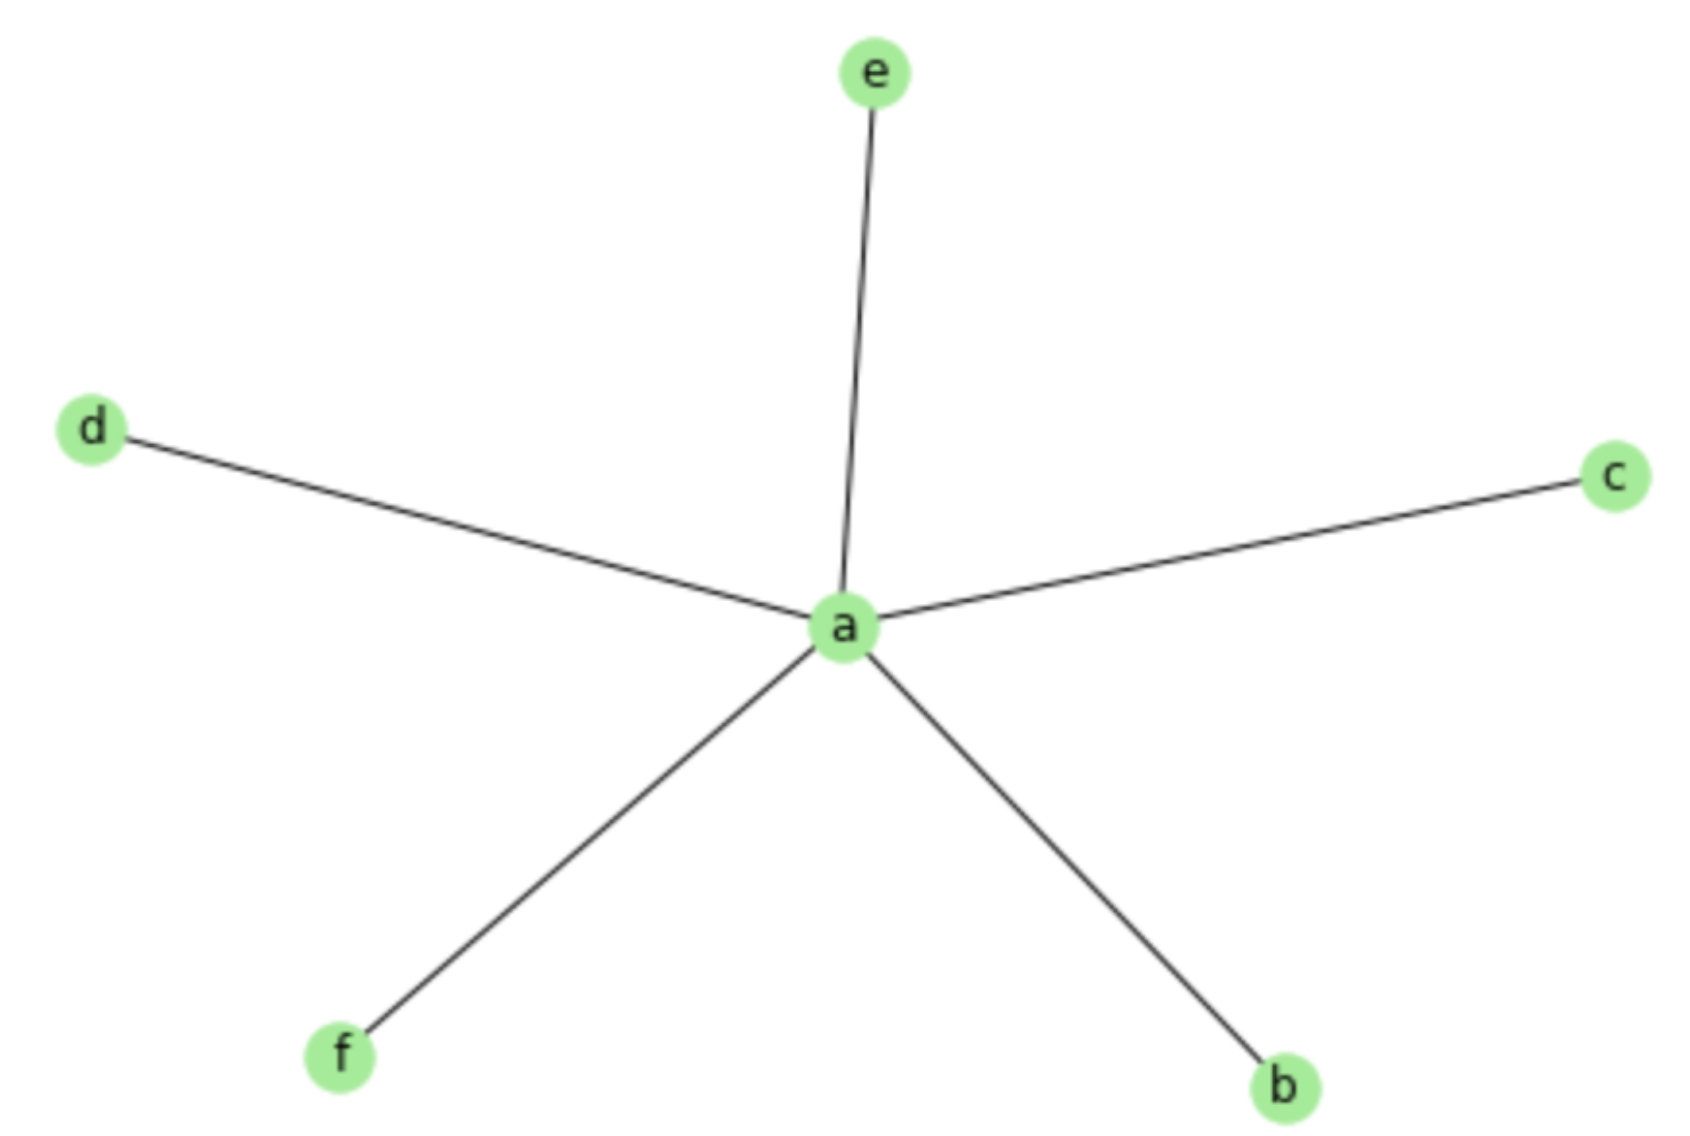

#### 2.1.1. Нормальное распределение

In [3]:
with open("data/star_normal.json", "r") as read_file:
    data = json.load(read_file)
# pprint(data)
tuples, values = for_normal(data)
index = pd.MultiIndex.from_tuples(tuples, names=['procedure', 'alpha', 'algorithm'])
df = pd.DataFrame(values, index=index, columns=['20 obs', '100 obs', '500 obs'])
df

20 obs  100 obs  500 obs
procedure        alpha algorithm                          
pearson          -     -           0.410    0.999    1.000
sign             -     -           0.128    0.801    0.996
oneSided_notRand 0.1   Prim        0.000    0.058    0.652
                       Kruskal     0.974    0.998    1.000
oneSided_rand    0.1   Prim        0.000    0.037    0.633
                       Kruskal     0.995    0.998    1.000
oneSided_max     0.1   Prim        0.000    0.059    0.684
                       Kruskal     0.980    0.997    1.000
twoSided_rand    0.1   Prim        0.001    0.076    0.614
                       Kruskal     0.046    0.244    0.792
twoSided_max     0.1   Prim        0.035    0.766    0.993
                       Kruskal     0.040    0.768    0.994

#### 2.1.2. Распределение Стьюдента

In [4]:
with open("data/star_student.json", "r") as read_file:
    data = json.load(read_file)
# pprint(data)
tuples, values = for_stud(data)
index = pd.MultiIndex.from_tuples(tuples, names=['dof', 'procedure', 'alpha', 'algorithm'])
df = pd.DataFrame(values, index=index, columns=['20 obs', '100 obs', '250 obs'])
df

20 obs  100 obs  250 obs
dof procedure        alpha algorithm                          
2   pearson          -     -           0.063    0.322    0.476
    sign             -     -           0.128    0.810    0.997
    oneSided_notRand 0.1   Prim        0.000    0.067    0.679
                           Kruskal     0.974    0.999    1.000
    oneSided_rand    0.1   Prim        0.000    0.032    0.653
                           Kruskal     0.991    0.999    1.000
    oneSided_max     0.1   Prim        0.000    0.043    0.701
                           Kruskal     0.975    0.998    1.000
    twoSided_rand    0.1   Prim        0.000    0.091    0.639
                           Kruskal     0.028    0.247    0.780
    twoSided_max     0.1   Prim        0.045    0.763    0.995
                           Kruskal     0.045    0.767    0.995
3   pearson          -     -           0.122    0.679    0.849
    sign             -     -           0.114    0.816    0.996
    oneSided_notRand 0.1   Prim        0.000    0.055    0.666
                           Kruskal     0.983    0.996    1.000
    oneSided_rand    0.1   Prim        0.000    0.026    0.634
                           Kruskal     0.991    0.999    1.000
    oneSided_max     0.1   Prim        0.000    0.062    0.660
                           Kruskal     0.988    0.998    1.000
    twoSided_rand    0.1   Prim        0.006    0.090    0.669
                           Kruskal     0.030    0.270    0.757
    twoSided_max     0.1   Prim        0.047    0.784    0.997
                           Kruskal     0.065    0.789    0.996

#### 2.1.3. Смешанное распределение

In [5]:
with open("data/star_mix.json", "r") as read_file:
    data = json.load(read_file)
# pprint(data)
tuples, values = for_mix(data)
index = pd.MultiIndex.from_tuples(tuples, names=['n rate', 'dof', 'procedure', 'alpha', 'algorithm'])
df = pd.DataFrame(values, index=index, columns=['20 obs', '100 obs', '250 obs'])
df

20 obs  100 obs  250 obs
n rate dof procedure        alpha algorithm                          
0.5    2   pearson          -     -           0.063    0.334    0.479
           sign             -     -           0.126    0.835    0.994
           oneSided_notRand 0.1   Prim        0.000    0.071    0.673
                                  Kruskal     0.982    0.997    1.000
           oneSided_rand    0.1   Prim        0.000    0.029    0.631
                                  Kruskal     0.991    0.998    1.000
           oneSided_max     0.1   Prim        0.000    0.054    0.653
                                  Kruskal     0.979    0.999    1.000
           twoSided_rand    0.1   Prim        0.003    0.096    0.616
                                  Kruskal     0.040    0.266    0.768
           twoSided_max     0.1   Prim        0.054    0.751    0.988
                                  Kruskal     0.058    0.755    0.988
       3   pearson          -     -           0.120    0.700    0.861
           sign             -     -           0.123    0.808    0.996
           oneSided_notRand 0.1   Prim        0.000    0.048    0.671
                                  Kruskal     0.966    0.999    1.000
           oneSided_rand    0.1   Prim        0.000    0.024    0.625
                                  Kruskal     0.990    1.000    1.000
           oneSided_max     0.1   Prim        0.000    0.055    0.666
                                  Kruskal     0.975    0.999    1.000
           twoSided_rand    0.1   Prim        0.002    0.088    0.616
                                  Kruskal     0.040    0.243    0.766
           twoSided_max     0.1   Prim        0.047    0.779    0.988
                                  Kruskal     0.053    0.781    0.990
0.3    2   pearson          -     -           0.075    0.317    0.491
           sign             -     -           0.134    0.817    0.994
           oneSided_notRand 0.1   Prim        0.000    0.055    0.654
                                  Kruskal     0.969    1.000    1.000
           oneSided_rand    0.1   Prim        0.000    0.028    0.624
                                  Kruskal     0.991    1.000    1.000
           oneSided_max     0.1   Prim        0.000    0.045    0.686
                                  Kruskal     0.972    0.996    1.000
           twoSided_rand    0.1   Prim        0.002    0.085    0.649
                                  Kruskal     0.030    0.258    0.767
           twoSided_max     0.1   Prim        0.036    0.767    0.994
                                  Kruskal     0.045    0.760    0.994
       3   pearson          -     -           0.115    0.691    0.855
           sign             -     -           0.133    0.807    0.995
           oneSided_notRand 0.1   Prim        0.000    0.063    0.663
                                  Kruskal     0.980    0.999    1.000
           oneSided_rand    0.1   Prim        0.000    0.032    0.616
                                  Kruskal     0.996    0.999    1.000
           oneSided_max     0.1   Prim        0.000    0.050    0.671
                                  Kruskal     0.978    0.999    1.000
           twoSided_rand    0.1   Prim        0.002    0.084    0.632
                                  Kruskal     0.040    0.258    0.779
           twoSided_max     0.1   Prim        0.049    0.782    0.991
                                  Kruskal     0.053    0.776    0.991

### 2.3. Для графа "две звезды" по реальным данным

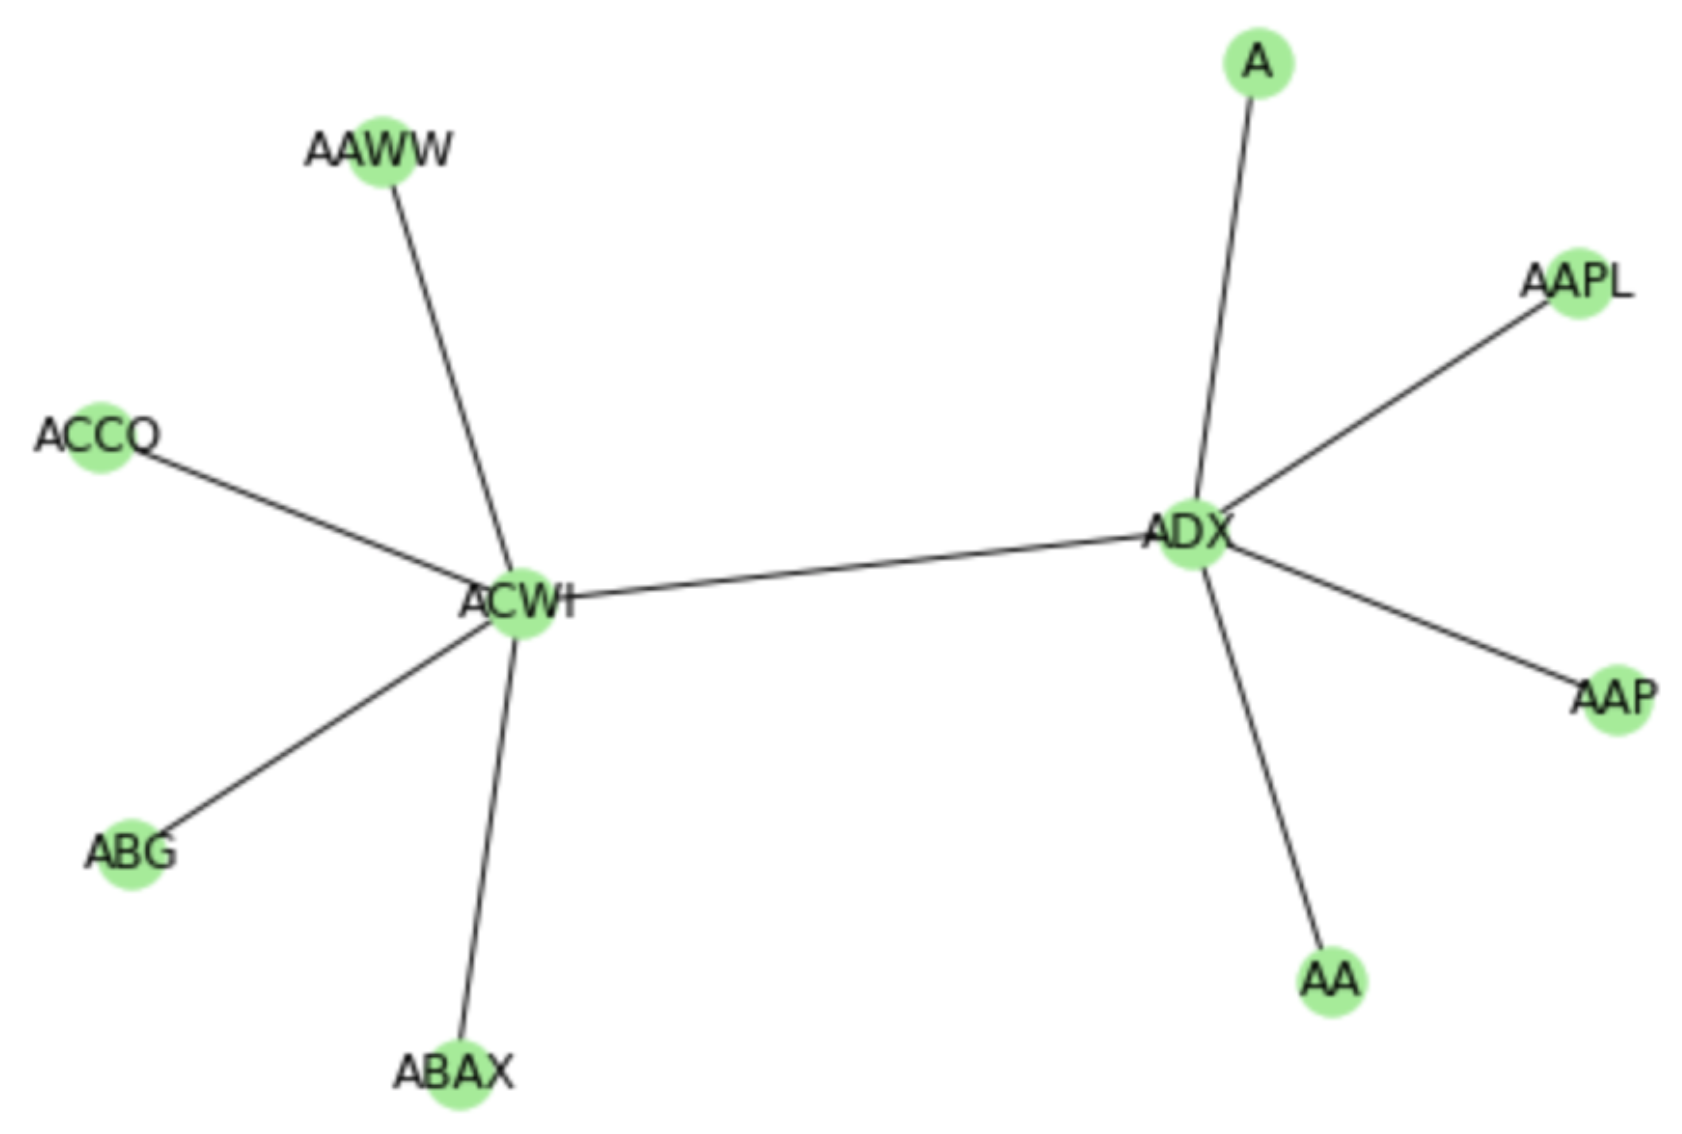

#### 2.1.1. Нормальное распределение

In [82]:
with open("data/twostars_normal.json", "r") as read_file:
    data = json.load(read_file)
# pprint(data)
tuples, values = for_normal(data)
index = pd.MultiIndex.from_tuples(tuples, names=['procedure', 'alpha', 'algorithm'])
df = pd.DataFrame(values, index=index, columns=['20 obs', '100 obs', '500 obs'])
df

20 obs  100 obs  500 obs
procedure        alpha algorithm                          
pearson          -     -           0.002    0.060    0.156
sign             -     -           0.000    0.004    0.033
oneSided_notRand 0.1   Prim        0.000    0.000    0.000
                       Kruskal     0.000    0.000    0.000
oneSided_rand    0.1   Prim        0.000    0.000    0.000
                       Kruskal     0.000    0.000    0.000
oneSided_max     0.1   Prim        0.000    0.000    0.000
                       Kruskal     0.000    0.000    0.000
twoSided_rand    0.1   Prim        0.000    0.000    0.000
                       Kruskal     0.000    0.001    0.004
twoSided_max     0.1   Prim        0.000    0.006    0.035
                       Kruskal     0.000    0.007    0.035

#### 2.1.2. Распределение Стьюдента

In [83]:
with open("data/twostars_student.json", "r") as read_file:
    data = json.load(read_file)
# pprint(data)
tuples, values = for_stud(data)
index = pd.MultiIndex.from_tuples(tuples, names=['dof', 'procedure', 'alpha', 'algorithm'])
df = pd.DataFrame(values, index=index, columns=['20 obs', '100 obs', '250 obs'])
df

20 obs  100 obs  250 obs
dof procedure        alpha algorithm                          
2   pearson          -     -           0.000    0.004    0.009
    sign             -     -           0.000    0.005    0.042
    oneSided_notRand 0.1   Prim        0.000    0.000    0.000
                           Kruskal     0.000    0.000    0.000
    oneSided_rand    0.1   Prim        0.000    0.000    0.000
                           Kruskal     0.000    0.000    0.000
    oneSided_max     0.1   Prim        0.000    0.000    0.000
                           Kruskal     0.000    0.000    0.000
    twoSided_rand    0.1   Prim        0.000    0.000    0.000
                           Kruskal     0.000    0.001    0.002
    twoSided_max     0.1   Prim        0.000    0.007    0.037
                           Kruskal     0.001    0.007    0.035
3   pearson          -     -           0.001    0.017    0.037
    sign             -     -           0.000    0.006    0.031
    oneSided_notRand 0.1   Prim        0.000    0.000    0.000
                           Kruskal     0.000    0.000    0.000
    oneSided_rand    0.1   Prim        0.000    0.000    0.000
                           Kruskal     0.000    0.000    0.000
    oneSided_max     0.1   Prim        0.000    0.000    0.000
                           Kruskal     0.000    0.000    0.000
    twoSided_rand    0.1   Prim        0.000    0.000    0.000
                           Kruskal     0.000    0.000    0.008
    twoSided_max     0.1   Prim        0.000    0.008    0.052
                           Kruskal     0.000    0.005    0.053

#### 2.1.3. Смешанное распределение

In [84]:
with open("data/twostars_mix.json", "r") as read_file:
    data = json.load(read_file)
# pprint(data)
tuples, values = for_mix(data)
index = pd.MultiIndex.from_tuples(tuples, names=['n rate', 'dof', 'procedure', 'alpha', 'algorithm'])
df = pd.DataFrame(values, index=index, columns=['20 obs', '100 obs', '250 obs'])
df

20 obs  100 obs  250 obs
n rate dof procedure        alpha algorithm                          
0.5    2   pearson          -     -           0.000    0.006    0.009
           sign             -     -           0.000    0.002    0.032
           oneSided_notRand 0.1   Prim        0.000    0.000    0.000
                                  Kruskal     0.000    0.000    0.000
           oneSided_rand    0.1   Prim        0.000    0.000    0.000
                                  Kruskal     0.000    0.000    0.000
           oneSided_max     0.1   Prim        0.000    0.000    0.000
                                  Kruskal     0.000    0.000    0.000
           twoSided_rand    0.1   Prim        0.000    0.000    0.000
                                  Kruskal     0.000    0.000    0.007
           twoSided_max     0.1   Prim        0.000    0.006    0.035
                                  Kruskal     0.000    0.006    0.037
       3   pearson          -     -           0.001    0.013    0.034
           sign             -     -           0.000    0.008    0.032
           oneSided_notRand 0.1   Prim        0.000    0.000    0.000
                                  Kruskal     0.000    0.000    0.000
           oneSided_rand    0.1   Prim        0.000    0.000    0.000
                                  Kruskal     0.000    0.000    0.000
           oneSided_max     0.1   Prim        0.000    0.000    0.000
                                  Kruskal     0.000    0.000    0.000
           twoSided_rand    0.1   Prim        0.000    0.000    0.000
                                  Kruskal     0.000    0.002    0.003
           twoSided_max     0.1   Prim        0.000    0.006    0.038
                                  Kruskal     0.000    0.008    0.043
0.3    2   pearson          -     -           0.000    0.002    0.011
           sign             -     -           0.000    0.003    0.032
           oneSided_notRand 0.1   Prim        0.000    0.000    0.000
                                  Kruskal     0.000    0.000    0.000
           oneSided_rand    0.1   Prim        0.000    0.000    0.000
                                  Kruskal     0.000    0.000    0.000
           oneSided_max     0.1   Prim        0.000    0.000    0.000
                                  Kruskal     0.000    0.000    0.000
           twoSided_rand    0.1   Prim        0.000    0.000    0.000
                                  Kruskal     0.000    0.001    0.005
           twoSided_max     0.1   Prim        0.000    0.010    0.032
                                  Kruskal     0.000    0.011    0.036
       3   pearson          -     -           0.000    0.006    0.033
           sign             -     -           0.000    0.002    0.028
           oneSided_notRand 0.1   Prim        0.000    0.000    0.000
                                  Kruskal     0.000    0.000    0.000
           oneSided_rand    0.1   Prim        0.000    0.000    0.000
                                  Kruskal     0.000    0.000    0.000
           oneSided_max     0.1   Prim        0.000    0.000    0.000
                                  Kruskal     0.000    0.000    0.000
           twoSided_rand    0.1   Prim        0.000    0.000    0.001
                                  Kruskal     0.000    0.000    0.002
           twoSided_max     0.1   Prim        0.000    0.005    0.038
                                  Kruskal     0.000    0.007    0.039